# CROP-seq KO150 - Plot KO cross-prediction similarity graph & interpretation
- goal: plot KO cross-prediction similarity graph with trapezoids denoting weighted and directed edges & intepret relationships within KO vs within condition
- input: adjacency matrix
- output: similarity graph, heatmap of adjacency matrix, quantification per KO of within KO and within condition similarity

Adjacency matrix A

A_ij is the weight of the edge from i -> j, ie the mean prediction probability of i being predicted as j

trapezoids: A_ij value is indicated by the width of the trapezoid at its SOURCE

In [ ]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

In [2]:
# libraries
libs <- c("sna", "ggplot2", "Hmisc", "reshape2")
lapply(libs, library, character.only = TRUE)
library(RColorBrewer)
library(svglite)
library(pheatmap)
library(ggplotify)
library(ggrepel)
library(stringr)
set.seed(42)

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”

‘network’ 1.17.1 (2021-06-12), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.6 created on 2020-10-5.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:network’:

    is.discrete


The followi

[[1]]
 [1] "sna"            "network"        "statnet.common" "stats"         
 [5] "graphics"       "grDevices"      "utils"          "datasets"      
 [9] "methods"        "base"          

[[2]]
 [1] "ggplot2"        "sna"            "network"        "statnet.common"
 [5] "stats"          "graphics"       "grDevices"      "utils"         
 [9] "datasets"       "methods"        "base"          

[[3]]
 [1] "Hmisc"          "Formula"        "survival"       "lattice"       
 [5] "ggplot2"        "sna"            "network"        "statnet.common"
 [9] "stats"          "graphics"       "grDevices"      "utils"         
[13] "datasets"       "methods"        "base"          

[[4]]
 [1] "reshape2"       "Hmisc"          "Formula"        "survival"      
 [5] "lattice"        "ggplot2"        "sna"            "network"       
 [9] "statnet.common" "stats"          "graphics"       "grDevices"     
[13] "utils"          "datasets"       "methods"        "base"

In [3]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path(data_path, 'KO_classifier')

# cond <- 'untreated'
# cond <- 'LO28-6h'
# cond <- 'LO28-24h'
cond <- 'all'

results_path <- file.path(results_path, cond)

# classifier flag
clf_label <- 'LR'
# clf_label <- 'RF'

# approach flag (counting or probabilities)
conn_label <- 'prob'
# conn_label <- 'count'

# directed or undirected (symmetric) graph
directed <- TRUE
# directed <- FALSE

In [4]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

## Load adjacency matrix

In [5]:
conn <- read.csv(file=file.path(results_path, paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
colnames(conn)<-gsub('.KO','',colnames(conn))
rownames(conn)<-gsub(' KO','',rownames(conn))
dim(conn)
conn

[1] 58 58

,LO28.24h.Chd4,LO28.24h.Ep400,LO28.24h.Ifnar1,LO28.24h.Ikzf1,LO28.24h.Irf9,LO28.24h.Jak1,LO28.24h.Myd88,LO28.24h.Sfpq,LO28.24h.Smc1a,LO28.24h.Spi1,⋯,untreated.Jak1,untreated.Med14,untreated.Runx1,untreated.Sf3b1,untreated.Sfpq,untreated.Smc1a,untreated.Spi1,untreated.Stat2,untreated.Tyk2,untreated.Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LO28-24h+Chd4,0.0000000000,0.0089739103,0.0072039933,0.0259591577,0.0169267457,0.0100494970,0.0219095210,0.0499805090,0.0425603472,0.0132924722,⋯,0.0008708462,0.0081101956,0.0088653022,0.0017104819,3.714806e-03,0.0034348010,0.0020874939,0.0010139953,0.0040839998,0.0031580799
LO28-24h+Ep400,0.0088609528,0.0000000000,0.0160354722,0.0555342898,0.0131302531,0.0470379484,0.0375018265,0.0060592256,0.0254255673,0.0152969626,⋯,0.0011115895,0.0015404166,0.0033052812,0.0065632012,3.341443e-03,0.0013634935,0.0033474318,0.0021925993,0.0029192400,0.0144762045
LO28-24h+Ifnar1,0.0017805465,0.0028169926,0.0000000000,0.0042596042,0.4605571271,0.1974118135,0.0032673130,0.0045182373,0.0027635765,0.0022785799,⋯,0.0128615371,0.0006465171,0.0001171158,0.0012575978,1.066486e-04,0.0005361280,0.0000986512,0.0107402903,0.0023043785,0.0002782323
LO28-24h+Ikzf1,0.0174286836,0.0174845960,0.0059193797,0.0000000000,0.0375308827,0.0157042458,0.0709464897,0.0158974300,0.0317629343,0.0224685871,⋯,0.0017325506,0.0046471393,0.0021643757,0.0026419774,4.279878e-03,0.0046440720,0.0028508458,0.0011848625,0.0020776944,0.0051826669
LO28-24h+Irf9,0.0026189127,0.0033577999,0.3859397491,0.0113159145,0.0000000000,0.1645422045,0.0060775102,0.0025790502,0.0039274585,0.0007915773,⋯,0.0311742579,0.0003874938,0.0003281283,0.0013607333,6.299277e-05,0.0004878817,0.0001787411,0.0132952219,0.0041832651,0.0008286832
LO28-24h+Jak1,0.0020244437,0.0135363428,0.3536896367,0.0042292332,0.3257720239,0.0000000000,0.0044068168,0.0013929314,0.0019847553,0.0011463017,⋯,0.0378398484,0.0002147972,0.0001048062,0.0008622843,3.511236e-05,0.0003960496,0.0005420760,0.0051668566,0.0028766879,0.0011904170
LO28-24h+Myd88,0.0298221701,0.0211276025,0.0107441198,0.1996485953,0.0329384241,0.0129887021,0.0000000000,0.0280340567,0.0808230103,0.0260752359,⋯,0.0002361228,0.0020041256,0.0042232026,0.0013849711,1.125848e-02,0.0011755329,0.0009944795,0.0011986218,0.0060549835,0.0075197037
LO28-24h+Sfpq,0.0719756351,0.0114049169,0.0165266999,0.0175390851,0.0239502086,0.0130811578,0.0199749194,0.0000000000,0.0396890029,0.0221052269,⋯,0.0010920733,0.0275556768,0.0025051363,0.0053231484,1.568399e-01,0.0013796578,0.0027025637,0.0013323615,0.0016559396,0.0045874039
LO28-24h+Smc1a,0.0385446540,0.0171576646,0.0062663933,0.0729930763,0.0051152787,0.0152440891,0.1054081700,0.0373809004,0.0000000000,0.0266977063,⋯,0.0004324909,0.0089806414,0.0008232787,0.0015313910,4.578082e-03,0.0566476065,0.0016674880,0.0002846626,0.0010398009,0.0025911697


## Load & filter annotations

In [6]:
# Load mixscape class information
annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
dim(annot_mixscape)
head(annot_mixscape)

[1] 3202    3

,mixscape_class,mixscape_class_p_ko,mixscape_class.global
,<chr>,<dbl>,<chr>
A1_AAACCTGCATGCTGGC-1,Smc1a,0.9950230,KO
A1_AAACGGGAGAAACGCC-1,Ifnar1,0.9960430,KO
A1_AAACGGGCACCTCGGA-1,Sfpq,1.0000000,KO
A1_AAACGGGGTCCAAGTT-1,Tyk2,0.9552953,KO
A1_AAAGATGGTAGCCTAT-1,Irf9,0.7050441,KO
A1_AAAGCAACAGTTAACC-1,Ep300,0.7731249,KO


In [7]:
if(cond=='all'){
    class_sizes <- rep(c(50),times=length(colnames(conn))) 
}else{
    class_sizes <- as.numeric((table(annot_mixscape$mixscape_class)[colnames(conn)]))
}


# ggplot
based on this: https://gist.github.com/dsparks/4331058

In [ ]:
# generate color vector
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

for (cut_off in c(0,0.1,0.2,0.25,0.5)){

    # data
    adjacencyMatrix <- as.matrix(conn)
    # parameters
    # cut_off <- 0.1
    curved=FALSE

    adjacencyMatrix[adjacencyMatrix<cut_off] <- 0

    # plot graph

    # Empty ggplot2 theme
    new_theme_empty <- theme_bw()
    new_theme_empty$line <- element_blank()
    new_theme_empty$rect <- element_blank()
    new_theme_empty$strip.text <- element_blank()
    new_theme_empty$axis.text <- element_blank()
    new_theme_empty$plot.title <- element_blank()
    new_theme_empty$axis.title <- element_blank()
    new_theme_empty$plot.margin <- structure(c(0, 0, 0, 0), unit = "lines",
                                             valid.unit = 3L, class = "unit")

    layoutCoordinates <- gplot(adjacencyMatrix, mode = "fruchtermanreingold")  # Get graph layout coordinates

    adjacencyList <- melt(adjacencyMatrix)  # Convert to list of ties only
    adjacencyList <- adjacencyList[adjacencyList$value > cut_off, ] # prune weak edges

    # Function to generate paths between each connected node
    edgeMaker <- function(whichRow, len = 100, curved = TRUE){
        fromC <- layoutCoordinates[adjacencyList[whichRow, 1], ]  # Origin
        toC <- layoutCoordinates[adjacencyList[whichRow, 2], ]  # Terminus

        # Add curve:
        graphCenter <- colMeans(layoutCoordinates)  # Center of the overall graph
        bezierMid <- c(fromC[1], toC[2])  # A midpoint, for bended edges
        distance1 <- sum((graphCenter - bezierMid)^2)
        if(distance1 < sum((graphCenter - c(toC[1], fromC[2]))^2)){
        bezierMid <- c(toC[1], fromC[2])
        }  # To select the best Bezier midpoint
        bezierMid <- (fromC + toC + bezierMid) / 3  # Moderate the Bezier midpoint
        if(curved == FALSE){bezierMid <- (fromC + toC) / 2}  # Remove the curve

        edge <- data.frame(bezier(c(fromC[1], bezierMid[1], toC[1]),  # Generate
                                c(fromC[2], bezierMid[2], toC[2]),  # X & y
                                evaluation = len))  # Bezier path coordinates
        edge$Sequence <- 1:len  # For size and colour weighting in plot
        edge$Group <- paste(adjacencyList[whichRow, 1:2], collapse = ">")

        # add a vector 'Probability' that linearly interpolates between the weights of the current edge and its counterpart
        x <- c(1,len)
        y <- c(adjacencyMatrix[adjacencyList[whichRow,'Var1'],adjacencyList[whichRow,'Var2']],adjacencyMatrix[adjacencyList[whichRow,'Var2'],adjacencyList[whichRow,'Var1']])
        edge$Probability <- approx(x,y,xout=1:len)$y

      return(edge)
    }

    # Generate a (curved) edge path for each pair of connected nodes
    allEdges <- lapply(1:nrow(adjacencyList), edgeMaker, len = 500, curved = curved)
    allEdges <- do.call(rbind, allEdges)  # a fine-grained path ^, with bend ^

    zp1 <- ggplot(allEdges)  # Pretty simple plot code
    zp1 <- zp1 + geom_path(aes(x = x, y = y, group = Group,  # Edges with gradient
                               colour = Sequence, size = Probability))  # and taper

    zp1 <- zp1 + geom_point(data = data.frame(layoutCoordinates),  # Add nodes
                            aes(x = x, y = y), size = class_sizes/5, pch = 21,
                            colour = "black", fill = sample(col_vector, dim(layoutCoordinates)[1])) 

    zp1 <- zp1 + geom_text(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=rownames(adjacencyMatrix)),hjust=0.5, vjust=-1)

    zp1 <- zp1 + scale_colour_gradient(low = gray(0), high = gray(0), guide = "none") # Customize gradient

    zp1 <- zp1 + scale_size(range = c(1/10, 5))#, guide = "none")  # Customize taper

    zp1 <- zp1 + new_theme_empty  # Clean up plot
    print(zp1)
    # save plot
    ggsave(file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_cutoff",cut_off,".svg")), zp1, h = 10, w = 10)
}

# Plot adjacency matrix of the crossprediction graph as heatmap

In [8]:
width <- 20
height <- 20
options(repr.plot.width=width, repr.plot.height=height)

In [9]:
annot_rows <- data.frame(t(data.frame(strsplit(rownames(conn), split='+', fixed=TRUE))))
rownames(annot_rows) <- rownames(conn)
colnames(annot_rows) <- c('cond','KO')

In [10]:
annot_cols <- annot_rows
rownames(annot_cols) <- colnames(conn)

In [11]:
ann_colors = list(cond = c("untreated"="green", "LO28-6h"="blue", "LO28-24h"="red"))

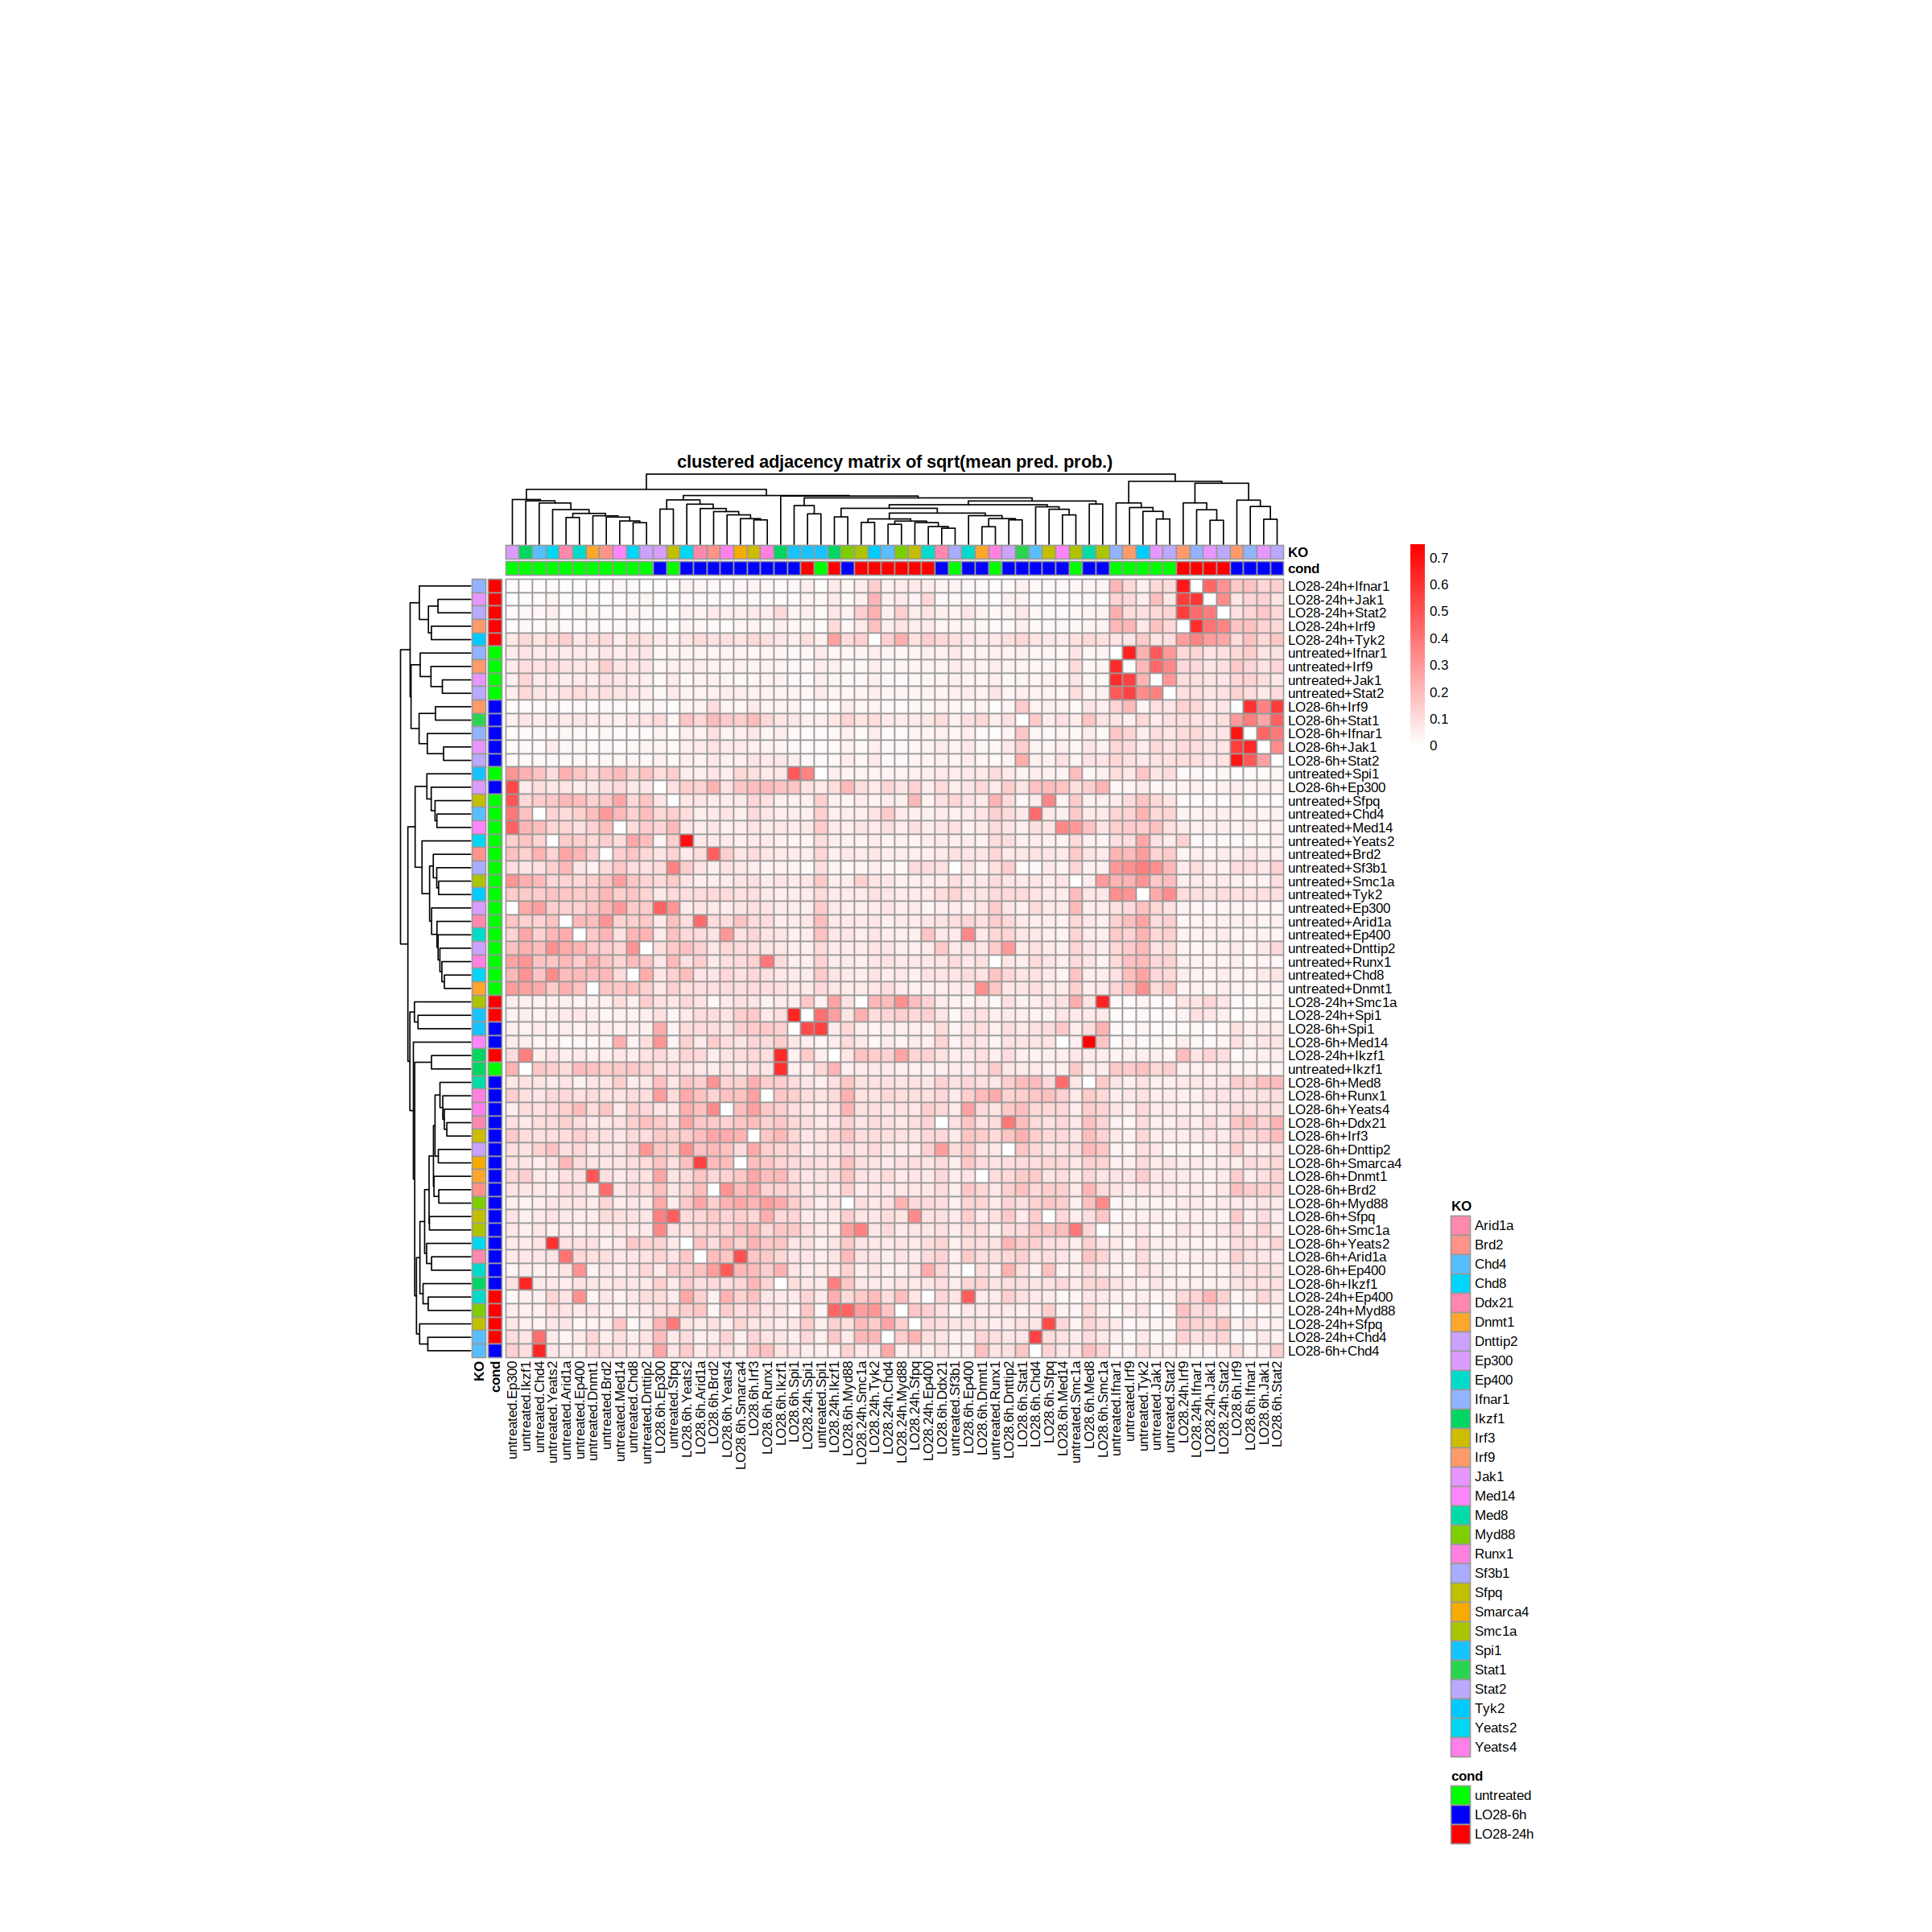

In [433]:
tmp_plot <- as.ggplot(pheatmap(sqrt(conn),
                               main = "clustered adjacency matrix of sqrt(mean pred. prob.)",
        cellwidth = 10,
             cellheight = 10,
             angle_col = "90",
             color=colorRampPalette(c("white", "red"))(200),
         annotation_col = annot_cols,
         annotation_row = annot_rows,
         annotation_colors = ann_colors
        ))

# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_sqrt_clustermap.png"),
      plot = tmp_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )

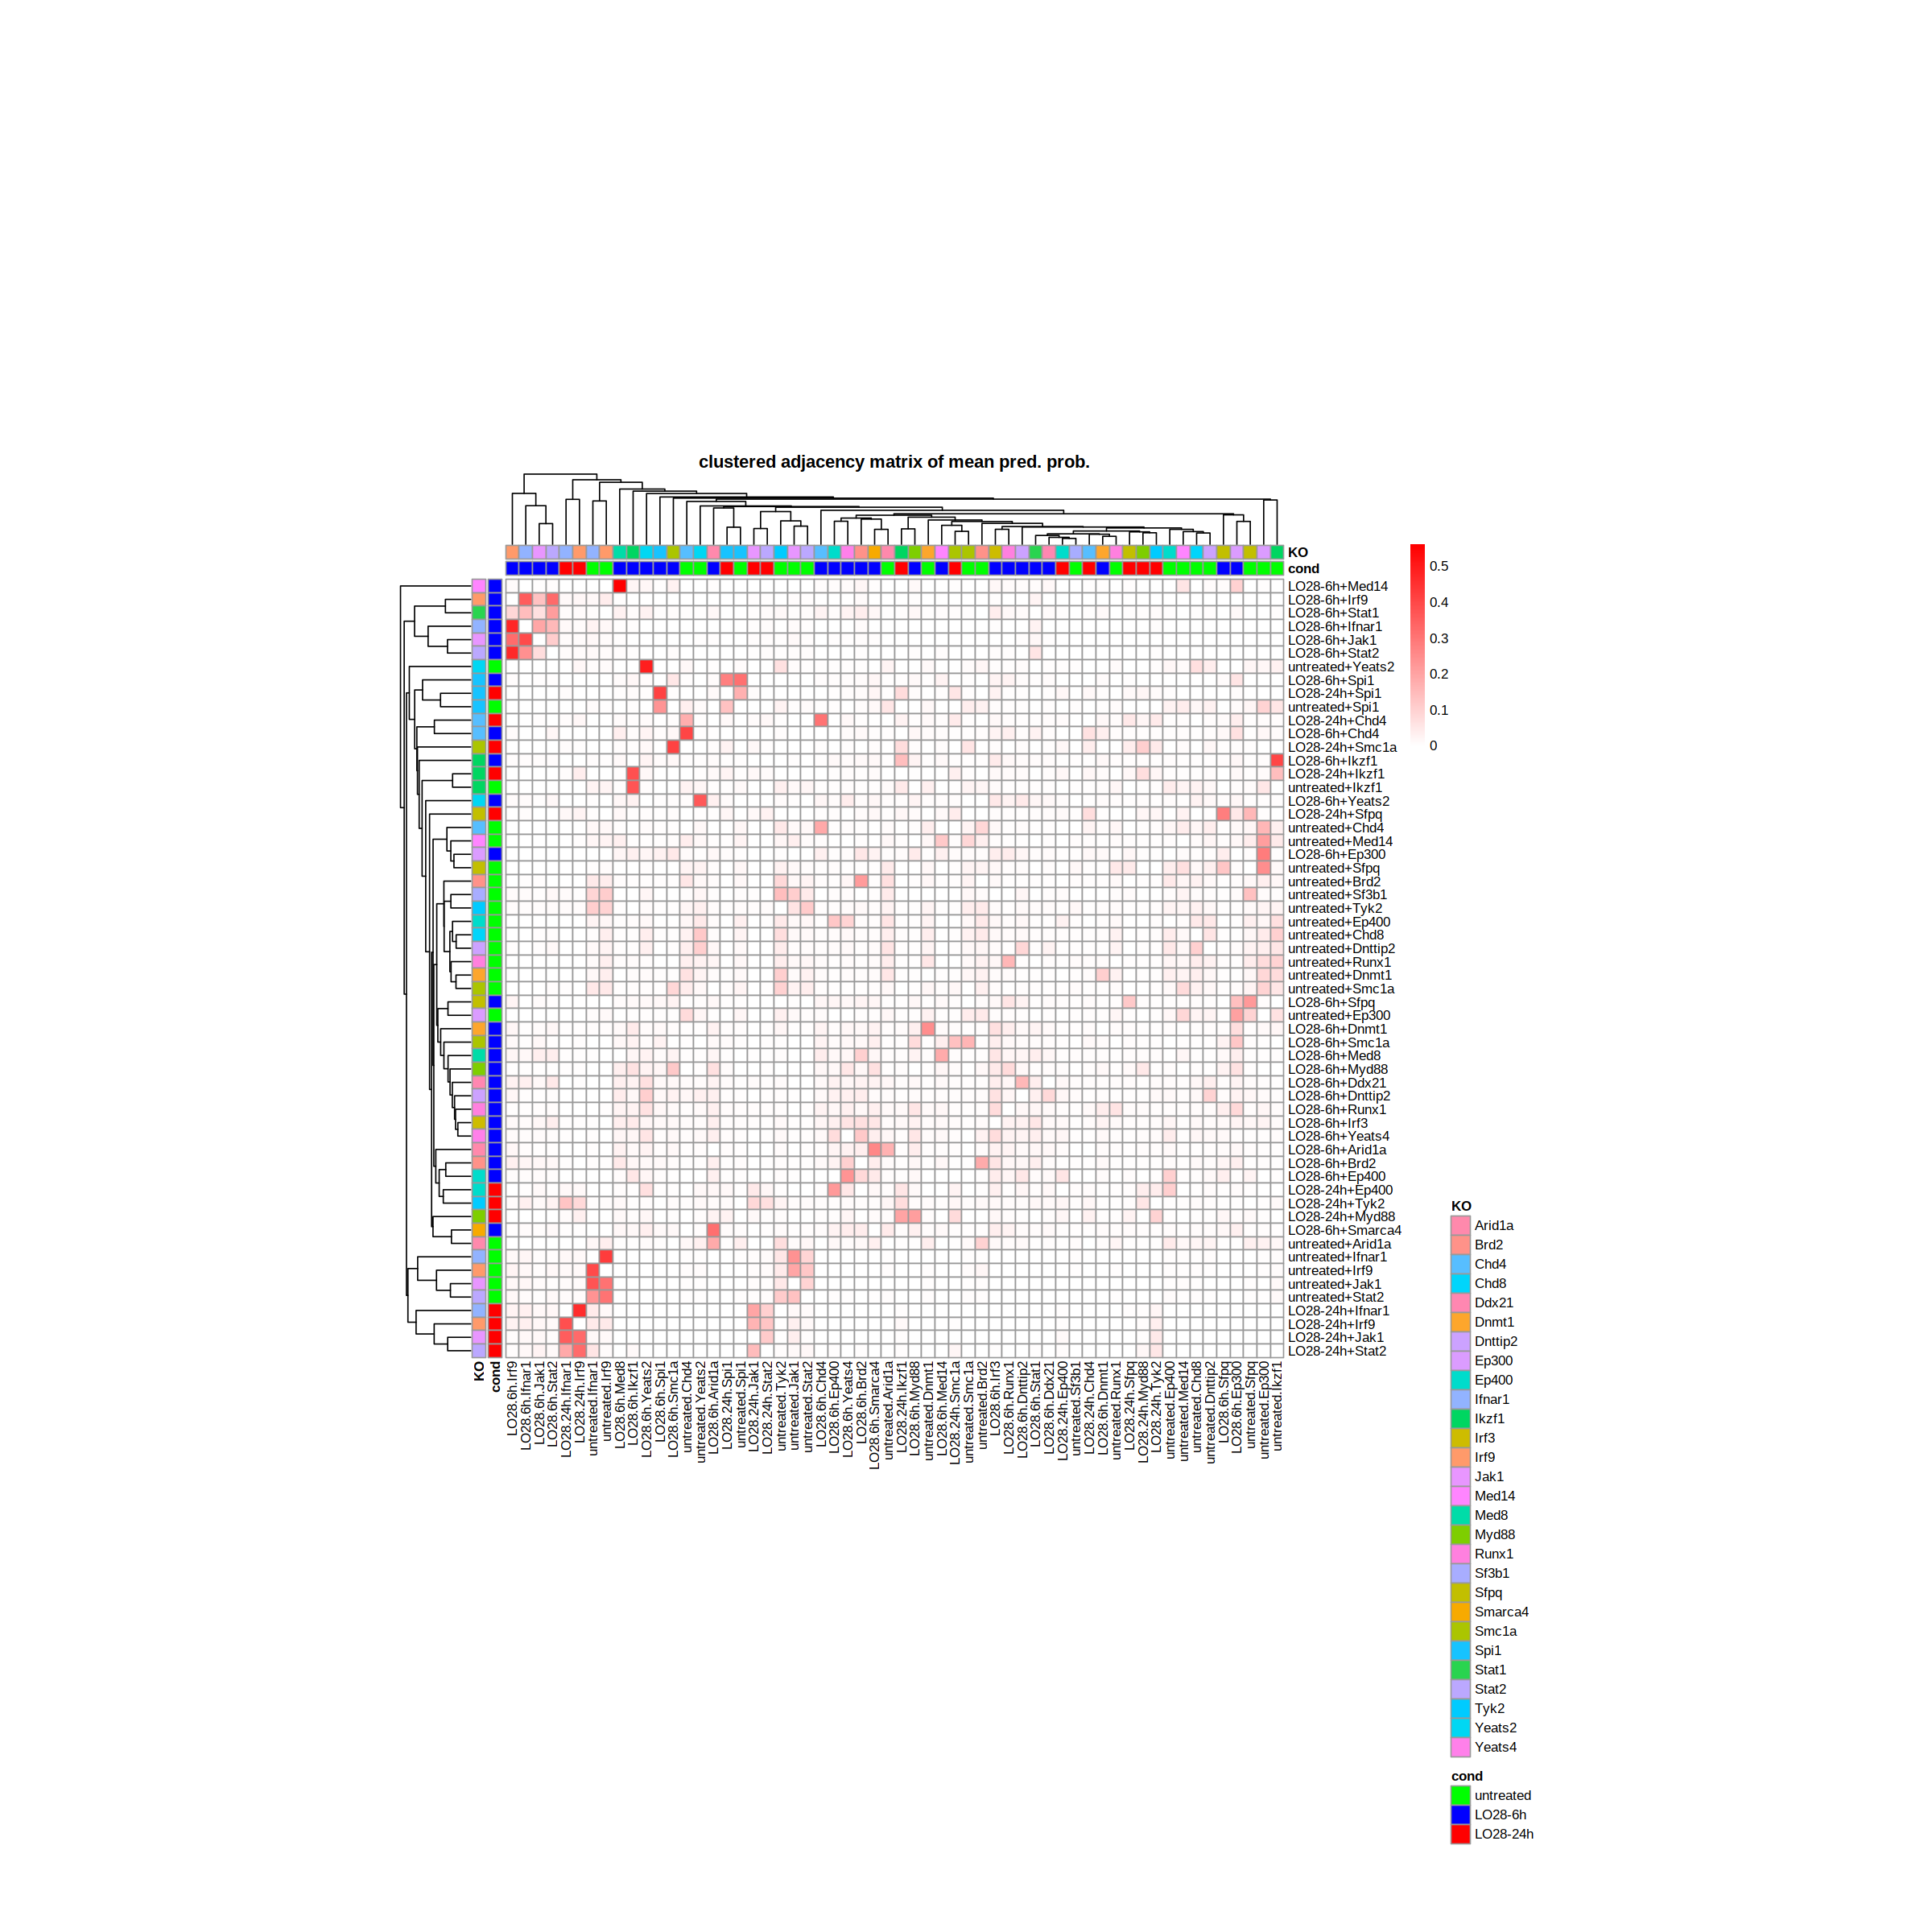

In [434]:
tmp_plot <- as.ggplot(pheatmap(conn,
                                main = "clustered adjacency matrix of mean pred. prob.",
        cellwidth = 10,
             cellheight = 10,
             angle_col = "90",
             color=colorRampPalette(c("white", "red"))(200),
         annotation_col = annot_cols,
         annotation_row = annot_rows,
         annotation_colors = ann_colors
        ))

# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_clustermap.png"),
      plot = tmp_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )

# quantify spectrum of within KO/condition similarity

In [12]:
width <- 5
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [13]:
KO_freq <- data.frame(table(annot_rows$KO))

In [14]:
conditions <- unique(annot_cols$cond)
KOs <- as.vector(KO_freq$Var1[KO_freq$Freq>1]) #unique(annot_cols$KO)

In [15]:
conn_cut <- conn
# conn_cut[conn_cut<0.1] <- 0
head(conn_cut)

,LO28.24h.Chd4,LO28.24h.Ep400,LO28.24h.Ifnar1,LO28.24h.Ikzf1,LO28.24h.Irf9,LO28.24h.Jak1,LO28.24h.Myd88,LO28.24h.Sfpq,LO28.24h.Smc1a,LO28.24h.Spi1,⋯,untreated.Jak1,untreated.Med14,untreated.Runx1,untreated.Sf3b1,untreated.Sfpq,untreated.Smc1a,untreated.Spi1,untreated.Stat2,untreated.Tyk2,untreated.Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LO28-24h+Chd4,0.000000000,0.008973910,0.007203993,0.025959158,0.01692675,0.01004950,0.021909521,0.049980509,0.042560347,0.0132924722,⋯,0.0008708462,0.0081101956,0.0088653022,0.0017104819,3.714806e-03,0.0034348010,0.0020874939,0.001013995,0.004084000,0.0031580799
LO28-24h+Ep400,0.008860953,0.000000000,0.016035472,0.055534290,0.01313025,0.04703795,0.037501826,0.006059226,0.025425567,0.0152969626,⋯,0.0011115895,0.0015404166,0.0033052812,0.0065632012,3.341443e-03,0.0013634935,0.0033474318,0.002192599,0.002919240,0.0144762045
LO28-24h+Ifnar1,0.001780546,0.002816993,0.000000000,0.004259604,0.46055713,0.19741181,0.003267313,0.004518237,0.002763577,0.0022785799,⋯,0.0128615371,0.0006465171,0.0001171158,0.0012575978,1.066486e-04,0.0005361280,0.0000986512,0.010740290,0.002304379,0.0002782323
LO28-24h+Ikzf1,0.017428684,0.017484596,0.005919380,0.000000000,0.03753088,0.01570425,0.070946490,0.015897430,0.031762934,0.0224685871,⋯,0.0017325506,0.0046471393,0.0021643757,0.0026419774,4.279878e-03,0.0046440720,0.0028508458,0.001184863,0.002077694,0.0051826669
LO28-24h+Irf9,0.002618913,0.003357800,0.385939749,0.011315914,0.00000000,0.16454220,0.006077510,0.002579050,0.003927459,0.0007915773,⋯,0.0311742579,0.0003874938,0.0003281283,0.0013607333,6.299277e-05,0.0004878817,0.0001787411,0.013295222,0.004183265,0.0008286832
LO28-24h+Jak1,0.002024444,0.013536343,0.353689637,0.004229233,0.32577202,0.00000000,0.004406817,0.001392931,0.001984755,0.0011463017,⋯,0.0378398484,0.0002147972,0.0001048062,0.0008622843,3.511236e-05,0.0003960496,0.0005420760,0.005166857,0.002876688,0.0011904170


In [16]:
spectrum <- data.frame(row.names=KOs)
spectrum$KO_score <- 0
spectrum$cond_score <- 0
head(spectrum)

,KO_score,cond_score
,<dbl>,<dbl>
Arid1a,0,0
Brd2,0,0
Chd4,0,0
Dnmt1,0,0
Dnttip2,0,0
Ep300,0,0


In [17]:
# determine connection to same KO
for (row in rownames(conn_cut)){
    KO_tmp <- strsplit(row,'+', fixed=TRUE)[[1]][2]
    
    tmp_cols <- grepl(KO_tmp, colnames(conn_cut), fixed=TRUE)
    
    if(!(KO_tmp %in% KOs)){
        next
    }
    
    tmp_score <- unname(sum(conn_cut[row,tmp_cols])/(sum(tmp_cols)-1))
    spectrum[KO_tmp, 'KO_score'] <- spectrum[KO_tmp, 'KO_score'] + tmp_score
}

# normalize to account for number of KOs present in graph
for (KO in rownames(spectrum)){
    spectrum[KO, 'KO_score'] <- spectrum[KO, 'KO_score']/sum(grepl(KO, colnames(conn_cut), fixed=TRUE))
}

In [18]:
# determine connection to same condition
for (row in rownames(conn_cut)){
    KO_tmp <- strsplit(row,'+', fixed=TRUE)[[1]][2]
    cond_tmp <- str_replace(strsplit(row,'+', fixed=TRUE)[[1]][1],'-', '.')
    
    tmp_cols <- grepl(cond_tmp, colnames(conn_cut), fixed=TRUE)
    
    if(!(KO_tmp %in% KOs)){
        next
    }
    
    tmp_score <- unname(sum(conn_cut[row,tmp_cols])/(sum(tmp_cols)-1))
    spectrum[KO_tmp, 'cond_score'] <- spectrum[KO_tmp, 'cond_score'] + tmp_score
}

# normalize to account for number of KOs present in graph
for (KO in rownames(spectrum)){
    spectrum[KO, 'cond_score'] <- spectrum[KO, 'cond_score']/sum(grepl(KO, colnames(conn_cut), fixed=TRUE))
}

In [19]:
spectrum$KO_score <- spectrum$KO_score/max(spectrum$KO_score)
spectrum$cond_score <- spectrum$cond_score/max(spectrum$cond_score)

In [20]:
dim(spectrum)
head(spectrum)

[1] 20  2

,KO_score,cond_score
,<dbl>,<dbl>
Arid1a,0.4150957,0.5388111
Brd2,0.4695088,0.5346155
Chd4,0.4536510,0.4464037
Dnmt1,0.4112235,0.5387529
Dnttip2,0.2148323,0.5665719
Ep300,0.5764069,0.5227884


In [21]:
# save score as CSV
write.csv(spectrum, file.path(results_path,paste0("KO150_clf",clf_label,"_graph",conn_label,"_scores.csv")))

In [22]:
# correlation
cor_p <- round(cor(spectrum$KO_score, spectrum$cond_score, method="pearson"), digits=2)
cor_s <- round(cor(spectrum$KO_score, spectrum$cond_score, method="spearman"), digits=2)

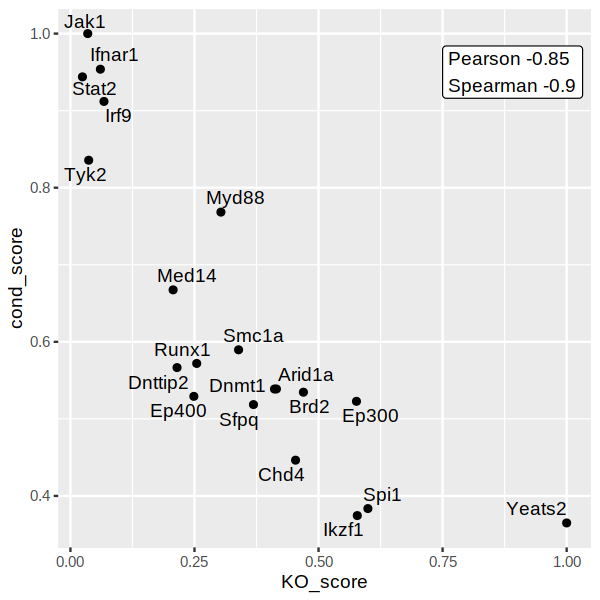

In [23]:
score_plot <- ggplot(data = spectrum, aes(x=KO_score, y=cond_score, label = rownames(spectrum))) + 
geom_point() + 
geom_text_repel() +
annotate(x=0.75, y = 0.95, label=paste0("Pearson ",cor_p,"\nSpearman ",cor_s), geom="label", hjust=0, size=4, color = 'black')

score_plot

In [24]:
# save plot
ggsave(paste0("KO150_clf",clf_label,"_graph",conn_label,"_scores.png"),
      plot = score_plot,
      device = 'png',
      path = file.path(results_path),
      scale = 1,
      dpi = 300,
        width = width,
        height = height,
      limitsize = FALSE,
    )